# Data Preprocessing

Data preprocessing



In [ ]:
# Saving files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import layers
from tensorflow.keras.models import Model
from keras.layers import Dense, Input

import requests

In [ ]:
# Calling the dat from envbigdata
# https://www.bigdata-environment.kr/user/data_market/detail.do?id=1ab48ac0-03e0-11ec-9c64-21be71573ba6#!

energy_data = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/재생에너지_발전_현황_(2015~2019년).csv')

print(energy_data)

      NO RGN_SORT     ENG_CLSF USE_CLSF      YR_2019      YR_2018  \
0      1       전국  신재생에너지 총발전량      사업용  38,028,933   37,255,151    
1      2       전국  신재생에너지 총발전량      자가용  13,093,152   15,463,106    
2      3       전국          태양광      사업용  11,759,577    8,219,173    
3      4       전국          태양광      자가용   1,236,441      988,925    
4      5       전국           풍력      사업용   2,669,463    2,454,329    
..   ...      ...          ...      ...          ...          ...   
661  662       제주    시멘트킬른보조연료      자가용            -            -   
662  663       제주        정제연료유      사업용            -            -   
663  664       제주         연료전지      사업용            -            -   
664  665       제주         연료전지      자가용            -            -   
665  666       제주         IGCC      사업용            -            -   

         YR_2017      YR_2016      YR_2015 UNIT  
0    31,649,620   26,806,171   23,829,002   MWh  
1    14,973,701   13,849,632   13,249,860   MWh  
2     6,220,719    4,

In [ ]:
# Calling the data of disaster

disaster_data = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/기상재해_데이터(전국).csv')

print(disaster_data)

            id     gid  SD_CD SD_NM  SGG_CD SGG_KOR_NM  inclination  \
0            1  나나7577     50    제주   50110        제주시     9.950996   
1            2  나나7578     50    제주   50110        제주시     9.950996   
2            3  나나7579     50    제주   50110        제주시     9.950996   
3            4  나나7580     50    제주   50110        제주시     9.950996   
4            5  나나7581     50    제주   50110        제주시     9.950996   
...        ...     ...    ...   ...     ...        ...          ...   
104176  104177  마아0800     42    강원   42830        양양군     2.010000   
104177  104178  마아0801     42    강원   42830        양양군     2.010000   
104178  104179  마아0802     42    강원   42830        양양군     2.010000   
104179  104180  마아0803     42    강원   42830        양양군     2.010000   
104180  104181  마아0900     42    강원   42830        양양군     2.010000   

        intercept   Depth_10    Depth_20    Depth_50  
0          -42.37  57.139958  156.649916  455.179791  
1          -42.37  57.139958  156.649

In [ ]:
# Calling the Renewable Energy KEPCO
# https://bigdata.kepco.co.kr/cmsmain.do
# https://bigdata.kepco.co.kr/openapi/v1/renewEnergy.do?year=2022&metroCd=11&genSrcCd=1&apiKey=xxx&returnType=json: Example

red = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/2022_renewable_energy.csv')

print(red)

     genSrc metro     city  Cnt  capacity  areaCnt  areaCapacity
0       태양광    강원      강릉시  563  63581.63     7960    1017848.43
1       태양광    강원      고성군  526  88115.67     7960    1017848.43
2       태양광    강원      동해시   84   8656.47     7960    1017848.43
3       태양광    강원      삼척시  309  58574.95     7960    1017848.43
4       태양광    강원      속초시   62   5024.95     7960    1017848.43
..      ...   ...      ...  ...       ...      ...           ...
319     소수력    충남      예산군    1    480.00        4       1470.00
320  바이오에너지    충남      청양군    3   1780.00        5       3070.00
321  바이오에너지    충남      홍성군    1    430.00        5       3070.00
322     소수력    충북      보은군    1    600.00        1        600.00
323  바이오에너지    충북  청주시 흥덕구    1    870.00        1        870.00

[324 rows x 7 columns]


In [ ]:
# Calling the data from 기상청 + 기상 관측지점 정보
# https://apihub.kma.go.kr/
# https://apihub.kma.go.kr/api/typ01/url/kma_sfctm2.php?tm=202211300900&stn=0&help=1&authKey=mZOvs2kvTCeTr7NpL3wnKA
# https://data.kma.go.kr/tmeta/stn/selectStnList.do?pgmNo=123

wdf = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/기상정보_관측정보포함.csv')
wdf = wdf.iloc[:385279, :16]
wdf['최저기온(°C)'] = wdf['최저기온(°C)'].replace('               ', np.nan)
wdf['최저기온(°C)'] = wdf['최저기온(°C)'].astype(float)

# Fixing location
specified_location = '가덕'
filtered = wdf[wdf['지점명'] == specified_location]

# Data PreProcessing
filtered_data = filtered.copy()
filtered_data['최고기온(°C)'] = filtered_data['최고기온(°C)'].astype(float)
filtered_data['일시'] = pd.to_datetime(filtered_data['일시'])

# Renaming the column name to english
filtered_data.rename(columns={'지점':'location',
                              '지점명': 'location_name',
                              '일시': 'time',
                              '평균기온(°C)': 'avgtemp(°C)',
                              '최저기온(°C)': 'mintemp(°C)',
                              '최저기온 시각(hhmi)': 'mintemp_time(hhmi)',
                              '최고기온(°C)': 'maxtemp(°C)',
                              '최고기온 시각(hhmi)': 'maxtemp_time(hhmi)',
                              '일강수량(mm)': 'rain(mm)',
                              '최대 순간 풍속(m/s)': 'maxwind(m/s)',
                              '최대 순간풍속 시각(hhmi)': 'maxwind_time(hhmi)',
                              '평균 풍속(m/s)' : 'avgwind(m/s)',
                              '최대 순간 풍속 풍향(deg)': 'dirmaxwind(deg)',
                              '위도': 'latitude(deg)',
                              '경도': 'longtitude(deg)',
                              '노장해발고도(m)': 'height(m)'
                              }, inplace = True)

filtered_data

<ipython-input-6-4f9b38986022>:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  wdf = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/기상정보_관측정보포함.csv')


,location,location_name,time,avgtemp(°C),mintemp(°C),mintemp_time(hhmi),maxtemp(°C),maxtemp_time(hhmi),rain(mm),maxwind(m/s),maxwind_time(hhmi),avgwind(m/s),dirmaxwind(deg),latitude(deg),longtitude(deg),height(m)
163661,641,가덕,2022-01-01,-7.3,-13.5,541.0,0.8,1521.0,0.0,4.2,1301.0,1.5,261.0,36.5461,127.5239,79.12
163662,641,가덕,2022-01-02,-3.1,-9.2,310.0,6.0,1339.0,0.0,8.3,1452.0,1.8,302.7,36.5461,127.5239,79.12
163663,641,가덕,2022-01-03,-4.7,-11.2,724.0,2.9,1524.0,0.0,5.6,1133.0,1.8,305.2,36.5461,127.5239,79.12
163664,641,가덕,2022-01-04,-2.9,-8.5,2351.0,3.3,1419.0,0.0,9.2,1227.0,1.7,338.4,36.5461,127.5239,79.12
163665,641,가덕,2022-01-05,-3.8,-10.2,404.0,1.5,1505.0,0.0,4.3,1543.0,1.1,335.6,36.5461,127.5239,79.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164396,641,가덕,2024-01-06,-0.4,-4.0,726.0,5.7,1404.0,0.0,6.9,1509.0,1.1,290.0,36.5461,127.5239,79.12
164397,641,가덕,2024-01-07,-2.5,-7.0,2349.0,0.9,1418.0,0.0,13.1,1433.0,3.2,272.6,36.5461,127.5239,79.12
164398,641,가덕,2024-01-08,-5.0,-10.0,641.0,0.9,1457.0,0.0,4.4,1404.0,1.0,347.5,36.5461,127.5239,79.12
164399,641,가덕,2024-01-09,-0.6,-5.9,1.0,3.1,1117.0,2.0,4.5,1619.0,1.1,348.8,36.5461,127.5239,79.12


# Attempt 1


> ~2024.1.21


Tensorize all data from various locations -> cannot apply to DNN structure



In [ ]:
from collections import Counter

wdf = wdf.fillna(0)

gdf_count = wdf.groupby('지점명').count()

print(Counter(gdf_count['지점'] == 740))

Counter({True: 377, False: 150})


In [ ]:
filtered_gdf_count = gdf_count[gdf_count['지점'] == 740]
filtered_gdf_count = filtered_gdf_count.reset_index(level = '지점명')

print(filtered_gdf_count)

     지점명   지점   일시  평균기온(°C)  최저기온(°C)  최저기온 시각(hhmi)  최고기온(°C)  \
0     가곡  740  740       740       740            740       740   
1     가덕  740  740       740       740            740       740   
2    가덕도  740  740       740       740            740       740   
3     가산  740  740       740       740            740       740   
4    가파도  740  740       740       740            740       740   
..   ...  ...  ...       ...       ...            ...       ...   
372   화순  740  740       740       740            740       740   
373   화천  740  740       740       740            740       740   
374   화촌  740  740       740       740            740       740   
375   황성  740  740       740       740            740       740   
376   횡성  740  740       740       740            740       740   

     최고기온 시각(hhmi)  일강수량(mm)  최대 순간 풍속(m/s)  최대 순간풍속 시각(hhmi)  평균 풍속(m/s)  \
0              740       740            740               740         740   
1              740       740            7

In [ ]:
print(wdf.dtypes)

지점                    int64
지점명                  object
일시                   object
평균기온(°C)            float64
최저기온(°C)            float64
최저기온 시각(hhmi)       float64
최고기온(°C)            float64
최고기온 시각(hhmi)       float64
일강수량(mm)            float64
최대 순간 풍속(m/s)       float64
최대 순간풍속 시각(hhmi)    float64
평균 풍속(m/s)          float64
최대 순간 풍속 풍향(deg)    float64
위도                  float64
경도                  float64
노장해발고도(m)           float64
dtype: object


In [ ]:
wdf = wdf.sort_values(by=['지점명', '일시'])

filtered_wdf = wdf[wdf['지점명'].isin(filtered_gdf_count['지점명'])]

filtered_wdf.set_index('지점명', inplace=True)
filtered_wdf['일시'] = filtered_wdf['일시'].astype('datetime64').astype(int)
filtered_wdf['일시'] = filtered_wdf['일시'].astype(float)

target_wdf = filtered_wdf.loc[:, '평균기온(°C)'].to_numpy()
target_wdf = target_wdf.reshape(377, 740, 1)
filtered_wdf = filtered_wdf.drop(['평균기온(°C)','지점'], axis=1).to_numpy()
filtered_wdf = filtered_wdf.reshape(377, 740, 13)

print(filtered_wdf)

print("filtered shape :" , filtered_wdf.shape)
print("target shape :", target_wdf.shape)

[[[ 1.6409952e+18 -1.3500000e+01  7.4800000e+02 ...  3.6125000e+01
    1.2769240e+02  1.2266000e+02]
  [ 1.6410816e+18 -1.0700000e+01  4.5600000e+02 ...  3.6125000e+01
    1.2769240e+02  1.2266000e+02]
  [ 1.6411680e+18 -1.2700000e+01  7.5600000e+02 ...  3.6125000e+01
    1.2769240e+02  1.2266000e+02]
  ...
  [ 1.7046720e+18 -1.1000000e+01  7.3200000e+02 ...  3.6124700e+01
    1.2768510e+02  1.1840000e+02]
  [ 1.7047584e+18 -6.9000000e+00  2.1000000e+01 ...  3.6124700e+01
    1.2768510e+02  1.1840000e+02]
  [ 1.7048448e+18 -4.0000000e+00  2.3380000e+03 ...  3.6124700e+01
    1.2768510e+02  1.1840000e+02]]

 [[ 1.6409952e+18 -1.3500000e+01  5.4100000e+02 ...  3.6546100e+01
    1.2752390e+02  7.9120000e+01]
  [ 1.6410816e+18 -9.2000000e+00  3.1000000e+02 ...  3.6546100e+01
    1.2752390e+02  7.9120000e+01]
  [ 1.6411680e+18 -1.1200000e+01  7.2400000e+02 ...  3.6546100e+01
    1.2752390e+02  7.9120000e+01]
  ...
  [ 1.7046720e+18 -1.0000000e+01  6.4100000e+02 ...  3.6546100e+01
    1.2752

<ipython-input-218-b8570cfba950>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wdf['일시'] = filtered_wdf['일시'].astype('datetime64').astype(int)
<ipython-input-218-b8570cfba950>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wdf['일시'] = filtered_wdf['일시'].astype(float)


In [ ]:
print(wdf.columns)

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간풍속 시각(hhmi)',
       '평균 풍속(m/s)', '최대 순간 풍속 풍향(deg)', '위도', '경도', '노장해발고도(m)'],
      dtype='object')


In [ ]:
tensor_wdf = tf.convert_to_tensor(filtered_wdf, dtype=tf.float32)
tensor_target = tf.convert_to_tensor(target_wdf, dtype=tf.float32)

# 텐서의 shape 확인
print(tensor_wdf.shape)
print(tensor_target.shape)

(377, 740, 13)
(377, 740, 1)


In [ ]:
'''
filtered_indices = gdf_count[gdf_count['지점'] == 740].index
filtered_gdf_count = wdf.loc[filtered_indices]

print(wdf.values)
'''

"\nfiltered_indices = gdf_count[gdf_count['지점'] == 740].index\nfiltered_gdf_count = wdf.loc[filtered_indices]\n\nprint(wdf.values)\n"

In [ ]:
# print(type(gdf_filtered))
# print(isinstance(gdf_filtered, pd.DataFrame))


In [ ]:
'''weather_data_list = [group.values for key, group in gdf_filtered]

weather_input = np.array(weather_data_list, dtype='float64')

# 결과 확인
print(weather_input)'''


"weather_data_list = [group.values for key, group in gdf_filtered]\n\nweather_input = np.array(weather_data_list, dtype='float64')\n\n# 결과 확인\nprint(weather_input)"

In [ ]:
'''print(gdf_filtered.dtypes)

print(weather_input)
print(weather_input.shape)'''

'print(gdf_filtered.dtypes)\n\nprint(weather_input)\nprint(weather_input.shape)'

In [ ]:
#gdf_count.to_csv('count.csv')

In [ ]:
# Calling the api from 지리정보
# https://www.vworld.kr/dtna/dtna_apiSvcFc_s001.do?apiNum=25

f"""rom urllib.parse import urlencode, quote_plus
from urllib.request import Request, urlopen

domain = "colab.research.google.com"
url = "http://api.vworld.kr/ned/data/getIndvdLandPriceAttr"
queryParams = "?" + urlencode quote_plus("key"): "152CD2BF-3A82-39BF-AB0B-382D31A0F478"
                               , quote_plus("pnu") : "1111017700102110000" # 고유번호(8자리 이상) */
                               , quote_plus("stdrYear") : "2015" #/* 기준연도(YYYY: 4자리) */
                               , quote_plus("format") : "json"
                               , quote_plus("numOfRows") : "10"
                               , quote_plus("pageNo") : "1"


request = Request(url + queryParams)
request.get_method = lambda: "GET"
response_body = urlopen(request).read()
print(response_body )"""


In [ ]:
# Test data split

from sklearn.model_selection import train_test_split

weather_train, weather_test, avg_temp_train, avg_temp_test = train_test_split(tensor_wdf, tensor_target, test_size = 0.2, random_state = 42)

TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([137, 101, 354, 196, 222, 351, 314,  75, 218,  94,  16,  66, 353,
         7, 157, 126, 333, 327, 158, 168, 211, 296,  60, 173, 275, 368,
       233, 331,  17, 155,  24, 109, 329, 132, 223, 232, 165, 350, 372,
       277, 220, 282, 167, 274, 119, 177, 363,  19, 209,  79, 249,  18,
       139, 288,  36, 366, 338, 193, 180,  59, 111, 198,   6, 305, 358,
        10, 175, 103,  81, 356, 219, 300, 194, 153, 152,  89, 341, 147,
       208,  92,  69, 123,  96, 143, 284,  97, 210,  68,  23,  37, 144,
       122,  67, 242, 195, 297, 322, 125, 146, 271,  86, 316, 244, 317,
       182, 283, 229, 265, 192, 325, 129,  38,  11, 294, 185, 202, 112,
       179, 250, 238, 117, 346, 362, 307, 340, 164, 245, 136, 154, 199,
       197, 369,   2, 204, 115, 304, 261,  26, 120, 287, 248, 301, 323,
       127,  74, 302,  29,  83, 310, 107, 227, 234, 133, 184, 272,  44,
       345,  65, 278,  85, 186,  70, 159,  12,  35,  28, 170, 142, 298,
       253, 150, 228, 221, 131, 281,  51, 240, 280,  95, 285, 178,  41,
       290, 206, 254, 311,   4, 256, 336, 100, 226, 321, 213, 171,  98,
       215,  61,  47,  32, 267, 200, 334,  27, 292, 230, 260, 162, 337,
       138,  62, 135, 128,   8,  64,  14, 156,  40, 375, 335, 216, 279,
       324, 236, 207, 212, 295, 342, 251, 367, 357, 303, 269, 201, 161,
        43, 217, 190, 309, 259, 105,  53,   1,  49,  80, 205,  34, 263,
        91,  52, 264, 241,  13, 315,  88, 273, 166, 328, 370, 134, 306,
       361, 319, 243,  54,  50, 174, 189, 374, 187, 169,  58,  48, 344,
       235, 252,  21, 313, 160, 276, 191, 293, 343, 257, 308, 149, 130,
       151, 359,  99,  87, 330, 214, 121, 376,  20, 188,  71, 106, 270,
       348, 102])

In [ ]:
# Constructing the model

input = Input(shape=(weather_train.shape[0], 1, weather_train.shape[1], weather_train.shape[2]), name="Input")
x = layers.Flatten(name = 'Flatten')(input)
x = layers.Dense(200, activation='relu', name="Dense1")(x)
x = layers.Dense(100, activation='relu', name="Dense2")(x)
output = layers.Dense(10, activation='softmax', name="Output")(x)

weather_model = Model(inputs=input, outputs=output, name="weather_model")
weather_model.summary()

Model: "weather_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 301, 1, 740, 13   0         
                             )]                                  
                                                                 
 Flatten (Flatten)           (None, 2895620)           0         
                                                                 
 Dense1 (Dense)              (None, 200)               579124200 
                                                                 
 Dense2 (Dense)              (None, 100)               20100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 579145310 (2.16 GB)
Trainable params: 579145310 (2.16 GB)
Non-trainable params: 0 (0.00 Byte)
___________

In [ ]:
weather_model.compile(loss=tf.keras.losses.MeanSquaredError(),   # loss = tensorflow.keras.losses.SparseCategoricalCrossentropy()
              optimizer='Adam',                          # optimizer = tensorflow.keras.optimizers.SGD()
              metrics=['accuracy'])                     # Accuracy

In [ ]:
# 모델 훈련 (훈련 데이터, 검증 데이터 이용)
history = weather_model.fit(weather_train, avg_temp_train,
                    epochs=100,
                    batch_size=128,
                    verbose=1)                           # 0: silent, 1: progress bar, 2: one line per epoch

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "weather_model" is incompatible with the layer: expected shape=(None, 301, 1, 740, 13), found shape=(None, 740, 13)


# Attempt 2


> Time series data preprocessing

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/





<Axes: >

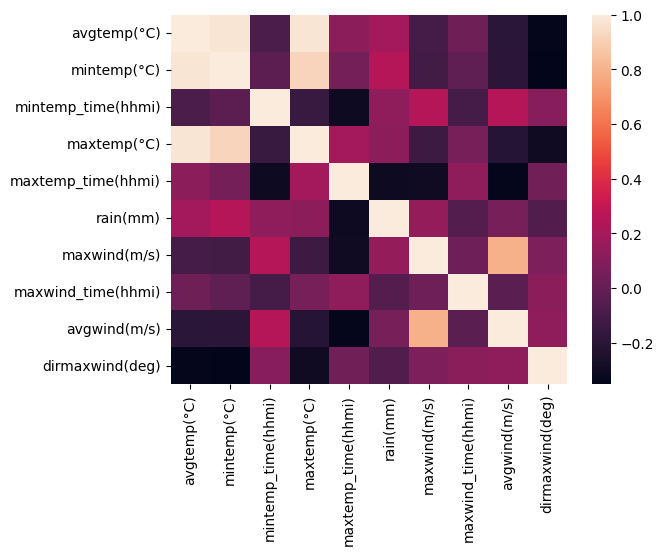

In [ ]:
# Checking the correlation
# Except latitude, longtitude, height above the sea, location

# Using the Pearson correlation coefficient
correlation = filtered_data.iloc[:,1:-3].corr(numeric_only=True)
correlation.style.background_gradient(cmap = 'BrBG')
sns.heatmap(correlation)

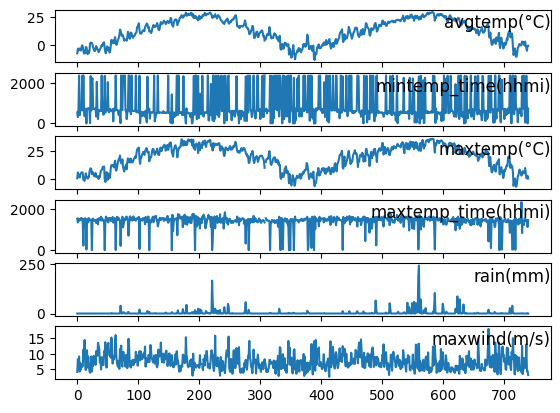

In [ ]:
# specify columns to plot
groups = [3, 5, 6, 7, 8, 9]
i = 1

# plot each column
plt.figure()
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(filtered_data.values[:, group])
 plt.title(filtered_data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

In [ ]:
from pandas import DataFrame
from pandas import concat

# convert series to supervised learning
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
from sklearn.preprocessing import LabelEncoder

# integer encode direction
encoder = LabelEncoder()
filtered_data.values[:,9] = encoder.fit_transform(filtered_data.values[:,9])

# ensure all data is float
filtered_data = filtered_data.drop('location_name', axis=1)
filtered_data['time'] = pd.to_numeric(pd.to_datetime(filtered_data['time']))
filtered_data = filtered_data.astype('float32')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
filtered_scaled = scaler.fit_transform(filtered_data.values)

# frame as supervised learning
filtered_reframed = series_to_supervised(filtered_scaled, 1, 1)

# drop columns we don't want to predict
filtered_reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t)
1,0.0,0.000000,0.139860,0.132196,0.229334,0.176471,0.656304,0.000000,0.103226,0.551549,...,0.298824,0.577720,0.000000,0.367742,0.615613,0.303571,0.855394,0.0,0.0,0.0
2,0.0,0.001352,0.237762,0.223881,0.131412,0.298824,0.577720,0.000000,0.367742,0.615613,...,0.225882,0.657599,0.000000,0.193548,0.480272,0.303571,0.862682,0.0,0.0,0.0
3,0.0,0.002707,0.200466,0.181237,0.306910,0.225882,0.657599,0.000000,0.193548,0.480272,...,0.235294,0.612263,0.000000,0.425806,0.520153,0.285714,0.959475,0.0,0.0,0.0
4,0.0,0.004059,0.242424,0.238806,0.996609,0.235294,0.612263,0.000000,0.425806,0.520153,...,0.192941,0.649396,0.000000,0.109677,0.654221,0.178571,0.951312,0.0,0.0,0.0
5,0.0,0.005411,0.221445,0.202559,0.171259,0.192941,0.649396,0.000000,0.109677,0.654221,...,0.265882,0.624784,0.000000,0.283871,0.576156,0.321429,0.956268,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.0,0.993233,0.386946,0.377399,0.018228,0.390588,0.653282,0.000000,0.193548,0.605855,...,0.291765,0.605786,0.000000,0.277419,0.639796,0.178571,0.818367,0.0,0.0,0.0
736,0.0,0.994587,0.300699,0.334755,0.307758,0.291765,0.605786,0.000000,0.277419,0.639796,...,0.178824,0.611831,0.000000,0.677419,0.607552,0.553571,0.767639,0.0,0.0,0.0
737,0.0,0.995941,0.251748,0.270789,0.995761,0.178824,0.611831,0.000000,0.677419,0.607552,...,0.178824,0.628670,0.000000,0.116129,0.595248,0.160714,0.986006,0.0,0.0,0.0
738,0.0,0.997293,0.193473,0.206823,0.271725,0.178824,0.628670,0.000000,0.116129,0.595248,...,0.230588,0.481865,0.008197,0.122581,0.686466,0.178571,0.989796,0.0,0.0,0.0


In [ ]:
# split into train and test sets
n_train_hours = 365
train = filtered_reframed.values[:n_train_hours, :]
test = filtered_reframed.values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print("X train Shape:",train_X.shape)
print("Y train Shape:", train_y.shape)
print("X test Shape:", test_X.shape)
print("Y test Shape:", test_y.shape)

X train Shape: (365, 1, 29)
Y train Shape: (365,)
X test Shape: (328, 1, 29)
Y test Shape: (328,)


In [ ]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


# design network
model = Sequential()
model.add(LSTM(200, input_shape=(train_X.shape[1], train_X.shape[2]), name = 'LSTM'))
model.add(Dense(100, activation = 'tanh', name = 'Dense1'))
model.add(Dense(10, activation = 'tanh', name = 'Output'))

early_stopping = EarlyStopping(monitor="val_loss",
                               patience=8,
                               verbose=1,
                               restore_best_weights=True)

model.compile(loss='mae', optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM (LSTM)                 (None, 200)               184000    
                                                                 
 Dense1 (Dense)              (None, 100)               20100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 205110 (801.21 KB)
Trainable params: 205110 (801.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


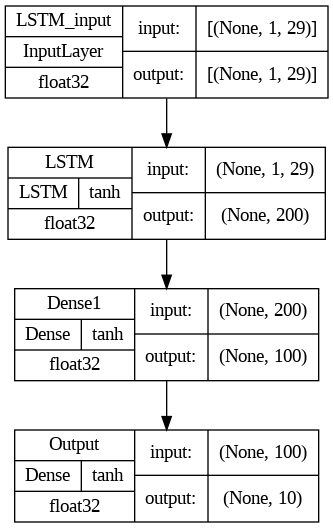

In [ ]:
from tensorflow.keras import utils

utils.plot_model(model, show_dtype=True, show_layer_activations=True, show_shapes=True)

Epoch 1/100
12/12 [==============================] - 4s 51ms/step - loss: 0.0331 - accuracy: 0.1918 - val_loss: 0.0242 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.0548 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 0.0356 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 0.0712 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 0.1041 - val_loss: 0.0086 - val_accuracy: 0.0030
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 0.0932 - val_loss: 0.0071 - val_accuracy: 0.0030
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 0.0822 - val_loss: 0.0063 - val_accuracy: 0.0

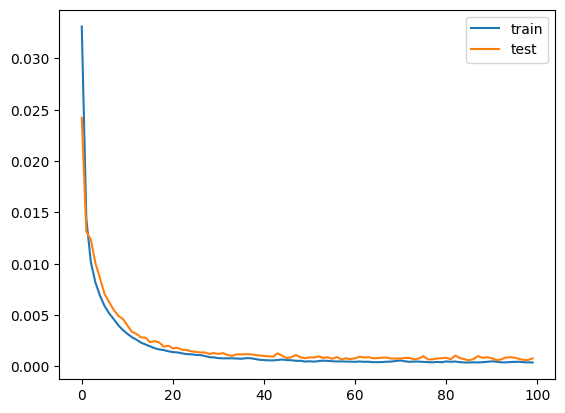

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=1)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
print("Original shape of test_X:", test_X.shape)

Original shape of test_X: (328, 1, 29)


In [ ]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(yhat)

11/11 [==============================] - 0s 2ms/step
[[ 4.5436792e-04 -2.7943507e-03  1.2816611e-03 ... -6.1104354e-04
  -3.8153623e-05  1.1121697e-03]
 [ 1.0756790e-03 -2.6800244e-03  9.6770009e-04 ... -1.0081829e-03
  -6.4131059e-04 -6.3840323e-04]
 [ 7.0892257e-04 -4.5092971e-04  8.0137706e-04 ...  4.2688221e-04
   4.9976003e-04 -1.5766945e-03]
 ...
 [-2.5816436e-05 -1.6382264e-03  1.0990202e-03 ... -7.5300271e-04
   2.0944506e-03  3.5781975e-04]
 [-3.4649565e-05 -8.0478593e-04 -1.5720440e-03 ...  4.3133419e-04
  -4.0771964e-05  2.0476842e-04]
 [ 2.1535048e-04 -5.9363339e-04 -7.5991731e-04 ...  1.1913233e-03
   1.5171841e-05  1.5080714e-04]]


In [ ]:
from sklearn.metrics import mean_squared_error

# Concatenate along the second axis
# Assuming test_X has shape (batch_size, time_steps, num_features)
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(inv_yhat[:, :15])
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y[:, :15])
inv_y = inv_y[:, 0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.10f' % rmse)

Test RMSE: 0.0009443687


# Attempt 3


> Directly convert to numpy


https://github.com/hoangdat252513/Weather-forecasting-with-Deep-Learninig/blob/main/LSTM_Time_Series_Forecasting.ipynb